In [8]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
def f(x):
    return (x**2)/(1+x**2)

In [50]:
knots = np.array([0,1,2,3])
values = f(knots)

In [35]:
values

array([0. , 0.5, 0.8])

In [9]:

def divided(knots, values):
    if len(knots)==1:
        return values[0]
    else:
        return (divided(knots[1:], values[1:]) - divided(knots[:-1], values[:-1]) )/ (knots[-1]-knots[0])


In [44]:

def divided (knots, values):
    matrix = np.zeros((len(knots), len(knots)))
    for i in range(len(knots)):
        matrix[i,0]=values[i]
    
    for j in range(1,len(knots)):
        for i in range(len(knots)-j):
                
            matrix[i,j] = (matrix[i+1,j-1]-matrix[i,j-1])/(knots[i+j]-knots[i])
    return matrix

In [45]:
def p_q(knots, values):
    matrix_divided = divided(knots, values)
    def pol(x):
        return matrix_divided[0,0]+matrix_divided[0,1]*(x-knots[0])+\
            matrix_divided[0,2]*(x-knots[0])*(x-knots[1])
    return pol

def p_c(knots, values):
    matrix_divided = divided(knots, values)
    def pol(x):
        return matrix_divided[0,0]+matrix_divided[0,1]*(x-knots[0])+\
            matrix_divided[0,2]*(x-knots[0])*(x-knots[1]) +\
            matrix_divided[0,3]*(x-knots[0])*(x-knots[1])*(x-knots[2])
    return pol


In [62]:
divided (knots, values)

array([[ 0.00000000e+00,  5.00000000e-01, -1.00000000e-01,
        -1.85037171e-17],
       [ 5.00000000e-01,  3.00000000e-01, -1.00000000e-01,
         0.00000000e+00],
       [ 8.00000000e-01,  1.00000000e-01,  0.00000000e+00,
         0.00000000e+00],
       [ 9.00000000e-01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00]])

In [51]:
newton_quad = p_q(knots[:-1],values[:-1])
newton_cubic = p_c(knots,values)

In [53]:
newton_cubic(3)

0.9

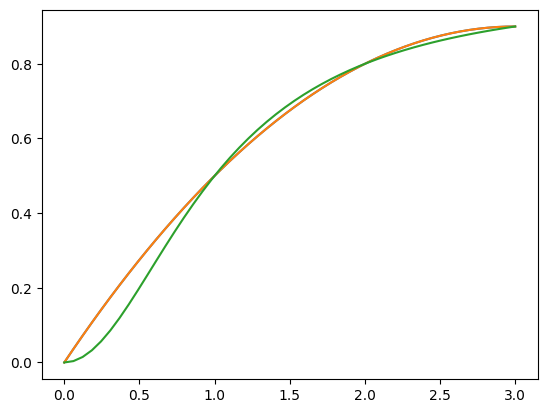

In [74]:
x = np.linspace(0,3)
y = newton_cubic(x)
z = newton_quad(x)


plt.plot(x,y)
plt.plot(x,z)
plt.plot(x,x**2/(x**2+1))

In [77]:
def box(N,func):
    x = np.linspace(0,3,N+1)
    y = func(x)
    intermezzo = y[:N].sum()
    return intermezzo/N

In [84]:
1-box(1000, newton_quad)/box(1000, f)

-0.028032211721413125